   # Introduction to Artificial Neural Networks with Keras
   
## From Biological to Artificial Neurons

Artificial Neural Networks were inspired by biological neurons. First introduced back in 1943, but entered a long winter as other methods worked better. We are now witnessing another wave of interest in ANNs. This time, there are a few good reasons to believe that this wave is different and that it will have a much more profound impact on our lives:

- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.
- The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore's Law, but also thanks to the gaming industry, which has produced powerful GPU cards by the millions.
- The training algos have been improved. To be fair they are only slighly different from the ones used in the 1990s, but these relatively small tweaks have a huge positive impact.
- Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algos were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (or when it is the case, they are usually fairly close to the global optimum).
- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding towards them, resulting in more and more progress, and even more amazing products.

## Biological Neurons

Before discussing artificial neurons, let's take a quick look at a biological neuron. It is an unusual-looking cell mostly found in animal cerebral cortexes, composed of a *cell body* containing the nucleus and most of the cell's complex components, and many branching extensions called *dendrites*, plus one very long extension called the *axon*. The axon's length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity the axon splits off into many branches called *telodendria*, and at the tip of these branches are minuscule structures called *synaptic terminals* (or simply *synapses*), which are connected to the dendrites (or directly to the cell body) of other neurons. Biological neurons receive short electrical impluses called *signals* from other neurons via these synapes. When a neuron receives a sufficient number of signals from other neurons within a few milliseconds, it fires its own signals.

![alt text](neuron.PNG "bio neuron")

Thus, individual biological neurons seem to behave in a rather simple way, but they are organized in a vast network of billions of neurons, each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a vast network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants. The architecture of biological neural networks is still the subject of active research, but some parts of the brain have been mapped, and it seems that neurons are often organized in consecutive layers.

## Logical Computations with Neurons

McCulloch and Pitts proposed a very simple model of the biological neuron, which later became known as an *artificial neuron*: it has one or more binary (on/off) inputs and one binary output. The artificial neuron simply activates its output when more than a certain number of its inputs are active. They showed that even with such a simplified model it is possible to build a network of artificial neurons that computes any logical proposition you want.

## The Perceptron

The *Perceptron* is one of the simplest ANN architecturesm invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes a *linear threshold unit* (LTU): the inputs and output are now numbers rather than binary on/off values and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs ($z = w_1x_1 + w_2x_2 + ... + w_nx_n = x^tw$), then applies a *step function* to that sum and outputs the results: $h_w(x) = step(z)$ , where $z = x^tw$.

![alt text](TLU.PNG "TLU")


A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class (just like a Logistic Regression classifier or a linear SVM). 

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layers (i.e., its input neurons), it is called a *fully connected* layer or a *dense leyaer*. To represent the fact that each input is sent to every TLU, it is common to draw special passthrough neurons called *input neurons*: they just output whatever input they are fed. All the input neurons form the *input layer*. Moreover, an extra bias feature is generally added ($x_0 = 1$): it is typically represented using a special type of neuron called a *bias neuron*, which just outputs 1 all the time. 
A Perceptron with two inputs and three outputs is represented below.

![alt text](perceptron.PNG "perceptron")

This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier.

Thanks to the magic of linear algebra, it is possible to efficiently compute the outputs of a layer of artificial neurons for several instances at once by using the equation below:

$$ h_{W,b}(X) = \phi(XW + b)$$

- As always, X represents the matrix of input features. It has one row per instance, one column per feature.
- The weight matrix W contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artifical neuron in the layer.
- The bias vector b contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.
- The function $\phi$ is called the *activation function*: when the artificial neurons are TLUs, it is a step function (but we will discuss other activation functions shortly).

So how is a Perceptron trained? The Perceptron training algo proposed was largely inspired by *Hebb's rule* (when a biological neuron often triggers another neuron, the connection between these two neurons grows stronger or "Cells that fire together, wire together"). The connection weight between two neurons is increased whenever they have the same output. Perceptrons are trained using a variant of this rule that takes into account the error made by the netwkork; it reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed the correct prediction. The rule is shown in the equation below:

$$ w_{i,j}^{(next step)} = w_{i,j} + \eta(y_j - \hat{y_j})x_i $$

where:

- $ w_{i,j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron.
- $x_i$ is the $i^{th}$ input value of the current training instance.
- $\hat{y_j}$ is the output of the $j^{th}$ output neuron for the current training instance.
- $\eta$ is the learning rate.

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, it was demonstrated that this algo would converge to a solution. This is called the *Perceptron convergence theorem*.

Scikit-Learn provides a `Perceptron` class that implements a single TLU network. It can be used pretty much as you would expect.   

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa? 0 or 1

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


C:\Users\levka\Anaconda3\envs\ds001\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


You may have noticed the fact that the Perceptron learning algo strongly resembles Stochastic Gradient Descent. In fact, Scikit-Learn's `Perceptron` class is equivalent to using a `SGDClassifier` with the following hyperparameters: `loss="perceptron"`,`learning_rate="constant"`,`eta0=1` (the learning rate), and `penalty=None` (no regularization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic Regression over Perceptrons.

In the 1969 monograph titled *Perceptrons*, a number of serious weaknesses of Perceptrons were highlighed, in particular the fact that they are incapable of solving some trivial problems (e.g. the *Exclusive OR (XOR)* classification problem. 

However, it turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a *Multi-Layer Perceptron* (MLP). 

## Multi-Layer Perceptron and Backpropagation

An MLP is composed of one (passtrhough) *input layer*, one or more layers of TLUs called *hidden layers*, and one final layer of TLUs called the *output layer* (see figure below). The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

![alt text](MLP.PNG "MLP")

**Note**:

The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a *feedforward neural network* (FNN).

When an ANN contains a deep stack of hidden layers, it is called a *deep neuroal network* (DNN). The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. However, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

For many years researchers struggled to find a way to train MLPs, without success. In 1986 a groundbreaking paper was published introducing the *backpropagation* training algorithm, which is still used today. In short, it is simply Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network's error with regards to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

**Note**:

Automatically computing gradients is called *automatic differentiation*, or autodiff. There are various autodiff techniques, with different pros and cons. The one used by backpropagation is called *reverse-mode autodiff*. It is fast and precise, and is well suited when the function to differentiate has many variables (e.g. connection weights) and few outputs (e.g. one loss).

Let's run through this algo in a bit more detal:

- It handles one mini-batch at a time (for example containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an *epoch*.
- Each mini-batch is passed to the network's input layer, which just sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the *forward pass*: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
- Next the algo measures the network's output error (i.e. it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
- Then it computes how much each output connection contributed to the error. This is done analytically by simply applying the *chainrule*, which makes this step fast and precise.
- The algo then measures how much of these error contributions came from each connection in the layer below, again using the chain rule -- and so on until the algo reaches the input layer. As we explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the neame of the algorithm).
- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the nextwork, using the error gradients it just computed.

This algo is so important, it's worth summarizing again: for each training instance the backprop algo first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each conection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

**Caution**:

It is important to initialize all the hidden layers' connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won't be too smart. If instead you randomly initialize the weights, you *break the symmetry* and allow backpropagation to train a diverse team of neurons.

In order for this algo to work properly, the authors made a key change to the MLP's architecture: they replaced the step function with the logistic function, $\sigma(z) = 1 / (1 + exp(-z))$. This was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative everywehre, allowing Gradient Descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other *activation functions*, not just the logistic function. Two other popular activation function are:

*The hyperbolic tangent function:* $ tan(z) = 2\sigma(2z)-1$

Just like the logistic function it is S-shaped, continuous, and differentiable, but its output value ranges from -1 to 1 (instead of 0 to 1), which tends to make each layer's output more or less centered aroung 0 at the beginning of training. This often helps speed up convergence.

*The Rectified Linear Unit function:* $ReLU(z) = max(0,z)$

It is continuous but unfortunately not differentiable at z = 0 (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is 0 for z < 0. However, in practice it works very well and has the advantage of being fast to compute. Most importantly, the fact that it does not have a maximum output value also helps reduce some issues during Gradient Descent.

These popular activation functions and their derivatives are represented in the figure below.

Why do we need activation functions in the first place? Well, if you chain several linear transformations, all you get is a linear transformation. For example, say $f(x) = 2x + 3$ and $g(x) = 5x - 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x -1) + 3 = 10x +1$. So if you don't have some non-linearity between layers, then even a deep stack of layers is equivalent to a single layer: you cannot solve very complex problems with that.


![alt text](activationfuns.PNG "activationfuns")


But what can we do with them?

# Regression MLPs

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g. the price of a house given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e. to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center on an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more number: the width and the height of the object. So you end up with 4 output neurons.

In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. However, if you want to guarantee that the output will always be positive, then you can use the ReLU activation function, or the *softplus* activation function in the output layer. Finally, if you want to guarantee that the predictions will fall within a give range of values, then you can use the logistic function or the hyperbolic tangent, and scale the labels to the appropriate range: 0 to 1 for the logistic, or -1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean squared error, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both.

**Note**:

The Huber loss is quadratic when the error is smaller than a threshold $\delta$ (typically 1), but linear when the error is larger than $\delta$. This makes it less sensitive to outliers than the mean squared error, and it is often more precise and converges faster than the mean absolute error.

Typical Regression MLP Architecture:

|Hyperparameter| Typical Value|
|--------------|--------------|
|# input neurons| One per input feature (e.g., 28 x 28 = 784 for MNIST)|
|# hidden layers| Depends on the problem. Typically 1 to 5.|
|# neurons per hidden layer |Depends on the problem. Typically 10 to 100.|
|# output neurons| 1 per prediction dimension|
|Hidden activation| ReLU (or SELU, see Chapter 11)|
|Output activation| None or ReLU/Softplus (if positive outputs) or Logistic/Tanh (if bounded outputs)|
|Loss function| MSE or MAE/Huber (if outliers)|

# Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. Obviously, the estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks. For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or non-urgent email. In this case, you would need two output neurons, both using the logistic activation function: the first would output the probabiity that the email is spam and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to one. This lets the model output any combination of labels: you can have non-urgent ham, urgent ham, non-urgent spam, and perhaps even urgent spam.

If each instance can belong only to a single class, out of 3 or more possible classes (e.g. classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the *softmax* activation function for the whole output layer (see figure below). The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to one (which is required if the classes are exclusive). This is called multiclass classification.

![alt text](class.PNG "class")

Regarding the loss function, since we are predicting probability distributions, the cross-entropy (also called the log loss) is generally a good choice.

Typical Classification MLP Architecture


|Hyperparameter |Binary classification| Multilabel binary classification| Multiclass classification|
|---------------|---------------------|---------------------------------|--------------------------|
|Input and hidden layers| Same as regression| Same as regression| Same as regression|
|# output neurons| 1 |1 per label| 1 per class|
|Output layer activation| Logistic| Logistic| Softmax|
|Loss function| Cross-Entropy| Cross-Entropy| Cross-Entropy|

# Implementing MLPs with Keras

Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of neural networks. TensorFlow now comes bundled with its own Keras implementation called tf.keras. It only supports TensorFlow as the backend, but it has the advantage of offering some very useful extra features. For this reason, we will use tf.keras in this book.

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
keras.__version__

1.14.0


'2.2.4-tf'

## Building an Image Classifier Using the Sequential API

First, we need to load a dataset. We will tackle *Fashion MNIST*, which is a drop-in replacement of MNIST. It has the exact same format as MNIST, but the images represent fashion items rather than handwritten digits, so each class is more diverse and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

### Using Keras to Load the Dataset

Keras provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, the original California housing dataset, and more. Let's load Fashion MNIST:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 29x29 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (0 - 255) rather than floats (0.0 to 255.0). Here is the shape and data type of the training set:

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

Note that the dataset is already split into a training set and a test set, but there is no validation set, so let's create one. Moreover, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we just scale the pixel intensitiesdown to the 0-1 range by dividing them by 255.0 (this also converts them to floats):

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. However, for Fashion MNIST, we need the list of class names to know what we are dealing with:

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Creating the Model Using the Sequential API

Now let's build the neural network. Here is a classification MLP with two hidden layers:

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

W0823 11:32:15.065183 13840 deprecation.py:506] From C:\Users\levka\Anaconda3\envs\ds001\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Lets' go through this code line by line:

- The first line creates a `Sequential` model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.
- Next, we build the first layer and add it to the model. It is a `Flatten` layer whose role is simply to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1,1). This layer does not have any parameters., it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the `input_shape`: this does not include the batch size, only the shape of the instances. Alternatively, you could add a `keras.layers.InputLayer` as the first layer, setting `shape=[28,28]`
- Next we add a `Dense` hidden layer with 300 neurons. It will use the ReLU activation function. Each `Dense` layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes $ h_{W,b}(X) = \phi(XW + b)$.
- Next we add a second `Dense` hidden layer with 100 neurons, also using the ReLU activation function.
- Finally, we add a `Dense` output layer with 10 neurons (one per class) using the softmax activation function (because the classes are exclusive).

Instead of adding the layers one by one as we did, you can pass a list of layers when creating the `Sequential` model:

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

The model's `summary()` method displays the model's layers, including each layer's name (which is automatically generated unless you set it when creating the layer), its output shape (`None` means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters:

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that `Dense` layers often have a lot of parameters. This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. 

You can easily get a model's list of layers, to fetch a layer by its index, or you can fetch it by name:

In [11]:
model.layers

In [12]:
model.layers[1].name

'dense_3'

In [13]:
model.get_layer('dense_3').name

'dense_3'

All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` method. For a `Dense` layer, this includes both the connection weights and the bias terms:

In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.01700069, -0.04908524,  0.03225771, ..., -0.04404444,
        -0.03663135,  0.04914783],
       [-0.0300201 , -0.06689911,  0.04994996, ..., -0.01440933,
        -0.01641243,  0.00577749],
       [-0.05439606, -0.07156505, -0.05489115, ...,  0.01903838,
         0.02121542,  0.04227027],
       ...,
       [-0.05269217, -0.04640948, -0.07064886, ..., -0.04474382,
         0.03409272,  0.01258345],
       [ 0.06512965,  0.06660137, -0.04716873, ...,  0.0360424 ,
         0.06164545,  0.00366428],
       [-0.01184493, -0.0330516 ,  0.03280292, ...,  0.06456792,
         0.00195263, -0.07023211]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

Notice that the `Dense` layer initialized the connection weights randomly (which is needed to break symmetry, as we discussed earlier), and the biases were just initialized to zeros, which is fine. If yo ever want to use a diffrent initialization method, you can set `kernel_initializer` (*kernel* is another name for the matrix of connection weights) or `bias_initializer` when creating the layer.

**Note**:

The shape of the weight matrix depends on the number of inputs. This is why it is recommended to specify the `input_shape` when creating the first layer in a `Sequential` model. However, if you do not specify the input shape, it's okay: Keras will simply wait until it knows the input shape before it actually builds the model This will happen either when you feed it actual data (e.g. during training), or when you call its `build()` method. Until the model is really build, the layers will not have any weights, and you will not be able to do certain things (such as print the model summary or save the model), so if you know the input shape when creating the model, it is best to specify it.

### Compiling the Model

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can also specify a list o f extra metrics to compute during training and evaluation:

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

This requires some explanation. First, we use the `sparse_categorical_crossentropy` loss because we have sparse labels (i.e. for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors), then we would need to use the `"categorical_crossentropy"` loss instead. If we were doing binary classification (with one or more binary labels), then we would use the `"sigmoid"` activation function in the output layer instead of the `"softmax"` activation function, and we would use the `"binary_crossentropy"` loss.

Secondly, regarding the optimizer, `"sgd"` simply means that we will train the model using simple Stochastic Gradient Descent. 

Finally, since this is a classifier, it's useful to measure its `"accuracy"` during training and evaluation.

### Training and Evaluating the Model

Now the model is ready to be trained. For this we simply need to call its `fit()` method. We pass it the input features `(X_train)` and the target classes `(y_train)`, as well as the number of epochs to train. We also pass a validation set (this is optional): Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs: if the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set):

In [19]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.7280 - acc: 0.7613 - val_loss: 0.5112 - val_acc: 0.8254
Epoch 2/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.4904 - acc: 0.8290 - val_loss: 0.4437 - val_acc: 0.8484
Epoch 3/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.4444 - acc: 0.8446 - val_loss: 0.4428 - val_acc: 0.8550
Epoch 4/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.4169 - acc: 0.8544 - val_loss: 0.3964 - val_acc: 0.8668
Epoch 5/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3969 - acc: 0.8598 - val_loss: 0.3988 - val_acc: 0.8600
Epoch 6/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3795 - acc: 0.8661 - val_loss: 0.3737 - val_acc: 0.8692
Epoch 7/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.3662 - acc: 0.8711 - val_loss: 0.3

And that's it, the neural network is trained. At each epoch during training, Keras displays the number of instances processed so far (along with a progress bar), the mean training time per sample, the loss and accuracy (or any other extra metrics you asked for), both on the training set and the validation set. You can see that the training loss went down, which is a good sign, and the validation accuracy reached 89% after 30 epochs, not too far from the training accuracy, so there does not seem to be much overfitting going on.

**Note**:

Instead of passing a validation set using the `validation_data` argument, you could instead set `validation_split` to the ratio of the training set that you want Keras to use for validation (e.g. 0.1).

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set hte `class_weight` argument when calling the `fit()` method, giving a larger weight to underrepresented classes, and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. If you need per-instance weights instead, you can set the `sample_weight` argument (it supersedes `class_weight`). This could be useful for example if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple. 

The `fit()` method returns a `History` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on he validation set (if any). If you create a Pandas DataFrame using this dictionary and call its `plot()` method, you get the learning curves:

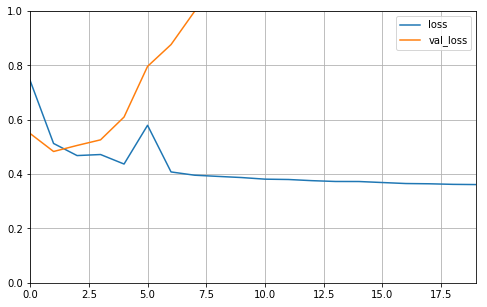

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

You can see that both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. Moreover, the validation curves are quite close to the training curves, which means that there is not too much overfitting. In this particular case, the model performed better on the validation set than on the training set at the beginning of training: this sometimes happens by chance (especially when the validation set is fairly small). However, the training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It's as simple as calling the `fit()` method again, since Keras just continues training where it left off.

If you are not satisfied with the performance of your model, you should go back and tune the model's hyperparameters, for example the number of layers, the number of neurons per layer, the types of activation functions we use for each hidden layer, the number of training epochs, the batch size (it can be set in the `fir()` method using the `batch_size` argument, which defaults to 32). 

Once you are satisfied with your model's validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deplou the model to production. You can easily do this using the `evaluate()` method (it also supports several other arguments, such as `batch_size` or `sample_weight`):

In [21]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 53.2413 - acc: 0.8655


[53.24129517326355, 0.8655]

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set. Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

### Using the Model to Make Predictions

Next, we can use the model's `predict()` method to make predictions on new instances. Since we don't have actual new instances, we will just use the first 3 instances of the test set:

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

As you can see for each instance the model estimates one probability per class, from class 0 to class 9. If you only care about the class with the highest estimated probability (even if the prob is quite low) then you can use the `predict_classes()` method instead:

In [23]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [24]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

And the classifier actually classified all three images correctly:

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Now you know how to build, train, evaluate and use a classification MLP using the sequential API. But what about regression?

## Building a Regression MLP Using the Sequential API

Let's switch to the California housing problem and tackle it using a regression neural network. For simplicity, we will use Scikit-Learn's `fetch_california_housing()` function to load the data: this dataset is simpler than the one used in chapter 2 since it contains only numerical features and there is no missing value. After loading the data, we split it into training set, a validation set and a test set, and we scale all the features:

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

Building, training, evaluating and using a regression MLP using the Sequential API to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting:

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20,
                   validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.7445 - val_loss: 0.5494
Epoch 2/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5126 - val_loss: 0.4831
Epoch 3/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4681 - val_loss: 0.5053
Epoch 4/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4719 - val_loss: 0.5260
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4369 - val_loss: 0.6099
Epoch 6/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5795 - val_loss: 0.7962
Epoch 7/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4079 - val_loss: 0.8765
Epoch 8/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3959 - val_loss: 0.9985
Epoch 9/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3915 - val_l

In [36]:
mse_test = model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 15us/sample - loss: 0.4318


In [39]:
X_new = X_test_scaled[3:]
y_pred = model.predict(X_new)
y_pred

array([[0.68670493],
       [2.383072  ],
       [1.4777709 ],
       ...,
       [1.8684225 ],
       [2.350346  ],
       [1.2349541 ]], dtype=float32)

As you can see, the Sequential API is quite easy to use. However, altough sequential models are extremely common, it is sometimes useful to build NN with more complex topologies, or with multiple inputs or outputs. For this purpose, Keras offers the Functional API.

## Building Complex Models Using the Functional API

One example of a non-sequential neural network is a *Wide & Deep* Neural network. This NN architecture was introduce in a 2016; it connects all or part of the inputs directly to the output layer, as shown in the figure below. This architecture makes it possible for the NN to learn both deep patterns (using the deep path) and simple rules (trough the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations.

![](widendeep.PNG "wnd")

Let's build such a NN to tackle the California housing problem:

In [80]:
def createmodel():
    nninput = keras.layers.Input(shape=X_train.shape[1:])
    hidden1 = keras.layers.Dense(30, activation="relu")(nninput)
    hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
    concat = keras.layers.Concatenate()([nninput, hidden2])
    nnoutput = keras.layers.Dense(1)(concat)
    model = keras.models.Model(inputs=[nninput], outputs=[nnoutput])
    model.compile(loss="mse", optimizer="sgd")
    return model
        
        

model = createmodel()

Let's go through each line of this code:

- FIrst, we need to create an `Input` object. This is needed because we my have multiple inputs, as we will see later.

- Next, we create a `Dense` layer with 30 neurons and using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together, no actual data is being processe yet.

- We then create a second hidden layer, and again we use it as a function. Note however that we pass it the output of the first hidden layer.

- Next, we create a `Concatenate()` layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer (you may prefer the `keras.layers.concatenate()` function, which creates a `Concatenate` layer and immediately calls it with the given inputs).

- Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation.

- Lastly, we create a `Keras Model`, specifying which inputs and outputs to use.

Once you have built the Keras model, everything is exactly like earlier, so no need to repeat it there: compile, train, evaulate and use the model to make predictions.

But what if you want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path (see figure below)? In this case, one solution is to use multiple inputs. For example, suppose we want to send 5 features through the deep path (features 0 to 4), and 6 features through the wide path (features 2 to 7):

In [45]:
input_a = keras.layers.Input(shape=[5])
input_b = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_a, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_a, input_b], outputs=[output])

![](widendeep2.PNG "")

The code is self-explanatory. Note that we specified `inputs=[input_a, input_b]` when creating the model. Nowe we can compile the model as usual, but when we call the `fit()` method, instead of passing a single input matrix `X_train`, we must pass a tuple of matrices `(X_train_a, X_train_b)`:  one per input. The same is true for `X_valid`, and also for `X_test`, and `X_new` when you call `evaluate()` or `predict()`:

In [47]:
model.compile(loss="mse", optimizer="sgd")

X_train_a, X_train_b = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_a, X_valid_b = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_a, X_test_b = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_a, X_new_b = X_test_a[:3], X_test_b[:3]

history = model.fit((X_train_a, X_train_b), y_train, epochs=20,
                    validation_data=((X_valid_a, X_valid_b), y_valid))
mse_test = model.evaluate((X_test_a, X_test_b), y_test)
y_pred = model.predict((X_new_a, X_new_b))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.7814 - val_loss: 0.6529
Epoch 2/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4770 - val_loss: 0.9749
Epoch 3/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4579 - val_loss: 0.8093
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4217 - val_loss: 0.8371
Epoch 5/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4127 - val_loss: 0.9972
Epoch 6/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4104 - val_loss: 1.1143
Epoch 7/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3979 - val_loss: 1.2609
Epoch 8/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3989 - val_loss: 1.2424
Epoch 9/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4014 - val_l

There are also many use cases in which you may want to have multiple outputs:

- The task may demand it, for example you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object's center, as well as its width and height) and a classification task.

- Similarly, you may have multiple independent tasks to perform based on the same data. Sure, you could train one neural network per task, but in mnay cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks.

- Another use case is a regularization technique (i.e. a training constraint whose objective is to reduce overfitting and thus improve the model's ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see figure below) to ensure that the underlying part of the network learns something useful on his own, without relying on the rest of the network.

![](auxin.png)

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model's list of outputs. For example, the following code builds the network represented in the figure above:

In [58]:
input_a = keras.layers.Input(shape=[5])
input_b = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_a, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_a, input_b],
                          outputs= [output, aux_output])

Each output will nedd its own loss function, so when we compile the model we should pass a list of losses (if we pass a a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute all these losses and simply add them up to get the final loss used for training. However, we care much more about the main output than about the auxiliary output (as it is just used for regularization), so we want to give the main output's loss a much greater weight. Fortunately, it is possible to set all the loss weights when compiling the model:

In [59]:
model.compile(loss=["mse","mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Now when we train the model, we need to provide some labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing `y_train`, we just nedd to pass `(y_train, y_train)`(and the same goes for `y_valid` and `y_test`):

In [60]:
history = model.fit(
    [X_train_a, X_train_b], [y_train, y_train], epochs = 20,
    validation_data=([X_valid_a, X_valid_b], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 57us/sample - loss: 1.0070 - dense_32_loss: 0.8954 - dense_33_loss: 2.0099 - val_loss: 0.5985 - val_dense_32_loss: 0.5198 - val_dense_33_loss: 1.3050
Epoch 2/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5799 - dense_32_loss: 0.5162 - dense_33_loss: 1.1525 - val_loss: 0.5582 - val_dense_32_loss: 0.5017 - val_dense_33_loss: 1.0675
Epoch 3/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5221 - dense_32_loss: 0.4707 - dense_33_loss: 0.9845 - val_loss: 0.6251 - val_dense_32_loss: 0.5889 - val_dense_33_loss: 0.9492
Epoch 4/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4850 - dense_32_loss: 0.4432 - dense_33_loss: 0.8608 - val_loss: 0.6843 - val_dense_32_loss: 0.6590 - val_dense_33_loss: 0.9118
Epoch 5/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4679 - dense_32_loss: 0.

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [53]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_a, X_test_b],[y_test, y_test])
total_loss, main_loss, aux_loss

5160/5160 [==============================] - 0s 21us/sample - loss: 0.4471 - dense_24_loss: 0.4301 - dense_25_loss: 0.5987


(0.4470983144848846, 0.43009374, 0.5987113)

Similarly, the `predict()` method will return predictions for each output:

In [54]:
y_pred_main, y_pred_aux = model.predict([X_new_a, X_new_b])
y_pred_main, y_pred_aux

(array([[3.4236002],
        [1.5668677],
        [1.601843 ]], dtype=float32), array([[2.7642164],
        [2.0975296],
        [2.427959 ]], dtype=float32))

As you can see, you can build any sort of architecture you want quite easily with the Functional API. Let's ook at one last way you can build Keras models.

## Building Duynamic MOdels Using the Subclassing API

Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then you can start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, shared, its structure can be displayed and analyzed, the framework can infer shapes and check types, so errors can be caught early (i.e. before any data ever goes through the model). It's also fairly easy to debug, since the whole model is just a static graph of layers. But the flip side is just that: it's static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you.

Simply subclass the `Model` class, create the layers you need in the constructor, and use them to perform the computations you want in the `call()` method. For example, creating an instance of the following `WideAndDeepModel` class gives us an equivalent model to the one we just built with the Functional API. You can then compile it, evaluate it and use it to make predictions, exactly like we just did.

In [55]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) #handles standard args (e.g. name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_a, input_b = inputs
        hidden1 = self.hidden1(input_b)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate(input_a, hidden2)
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [61]:
# model = WideAndDeepModel()

This example ooks very much like the Functional API, except we do not need to create the inputs, we just use the `input` arugment to the `call()` method, and we separate the creation of the layers in the constructor from their usage in the `call()` method. However, the big difference is that you can do pretty much anything you want in the `call()` method: `for` loops, `if` statements, low-level TensorFlow operations... This makes it a great API for researchers experimenting with new ideas.

However, this extra flexibility comes at a cost: your model's architecture is hidden within the `call()` method, so Keras cannot easily inspect it, it cannot save or clone it, and when you call the `summary()` method, you only get a list of layers, without any information on how they are connected to each other. Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes. So unless you really need that extra flexibility, you should probably stick to the Sequential API or the Functional API.

**Note**:

Keras models can be used just like regular layers, so you can easily compose them to build complex architectures.

## Saving and Restoring a Model

Saving a trained Keras model is as simple as it gets:

In [82]:
model = createmodel()
model.fit(X_train_scaled, y_train, epochs=20)
model.save("my_keras_model.h5")

Epoch 1/20
11610/11610 [==============================] - 1s 63us/sample - loss: 1.3774
Epoch 2/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5032
Epoch 3/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5456
Epoch 4/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4795
Epoch 5/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.9068
Epoch 6/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.1869
Epoch 7/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4231
Epoch 8/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4673
Epoch 9/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4400
Epoch 10/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3614
Epoch 11/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3570
Epoch 12/20
11610/11610 [=====

Keras will save both the model's architecture (including every layer's hyperparameters) and the value of all the model parameters for every layer (e.g. connection weights and biases), using the `HDF5`  format. It also saves the optimizer (including its hyperparameters and any state it may have).

You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. Loading the model is just as easy:

In [83]:
model = keras.models.load_model("my_keras_model.h5")

**Caution**:

This will work when using the Sequential API or the Functional API, but unfortunately not when using Model subclassing. However, you can use `save_weights()` and `load_weights()` to at least save and restore the model parameters (but you will need to save and restore everything else yourself).

But what if training lasts several hours? This is quite common, especially when training on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training. But how can you tell the `fit()` method to save checkpoints? The answer is: using callbacks.

## Using Callbacks

The `fit()` method accepts a `callbacks` argument that lets you specify a list of objects that Keras will call during training at the start and end of training, at the start and end of each epoch and even before and after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of you model at regular intervals during training, by default at the end of each epoch:

In [89]:
model = createmodel() # build and compile model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train_scaled, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
11610/11610 [==============================] - 1s 106us/sample - loss: 0.7556
Epoch 2/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5698
Epoch 3/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.8450
Epoch 4/10
11610/11610 [==============================] - 0s 35us/sample - loss: 2.4339
Epoch 5/10
11610/11610 [==============================] - 0s 34us/sample - loss: 1.2855
Epoch 6/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4282
Epoch 7/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4149
Epoch 8/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3825
Epoch 9/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4122
Epoch 10/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4211


Moreover, if you use a validation set during training, you can set `save_best_only=True` when creating the `ModelCheckpoint`. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. This is a simple way to implement early stopping:

In [90]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", 
                                                save_best_only=True)
history = model.fit(X_train_scaled, y_train, epochs=10,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3590 - val_loss: 2.2199
Epoch 2/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3575 - val_loss: 2.0196
Epoch 3/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3401 - val_loss: 2.1451
Epoch 4/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3374 - val_loss: 2.6385
Epoch 5/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3396 - val_loss: 2.9923
Epoch 6/10
11610/11610 [==============================] - 0s 43us/sample - loss: 0.3354 - val_loss: 3.0760
Epoch 7/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3436 - val_loss: 3.0575
Epoch 8/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3263 - val_loss: 3.1209
Epoch 9/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3231 - val_l

Another way to implement early stopping is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the `patience` argument), and it will optionally roll back to the best model. You can combine both callbacks to both save checkpoints of your model (in case your computer crashes), and actually interrupt training early when there is no progress (to avoid wasting time and resources):

In [91]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=100,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.3430 - val_loss: 2.3206
Epoch 2/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3416 - val_loss: 2.4887
Epoch 3/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3350 - val_loss: 3.0678
Epoch 4/100
11610/11610 [==============================] - 1s 43us/sample - loss: 0.3365 - val_loss: 2.9253
Epoch 5/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3287 - val_loss: 2.7615
Epoch 6/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3336 - val_loss: 3.2060
Epoch 7/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3206 - val_loss: 3.5643
Epoch 8/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3216 - val_loss: 3.3557
Epoch 9/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.317

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. Moreover, there is no need t orestore the best model saved in this case since the `EarlyStopping` callback will keep track of the best weights and restore them for us at the end of training.

If you need extra control, you can easily write your own custom callbacks. For example, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

In [92]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

As you might expect, you can implement `on_train_begin()`, `on_train_end()`, `on_epoch_begin()`, `on_batch_begin()`, and `on_batch_end()`.

Moreover, callbacks can also be used during evaluation and predictions, should you ever need them (e.g. for debugging). In this case, you should implement `on_test_begin()`, `on_test_end()`, `on_test_batch_begin()`, `on_test_batch_end()`, or `on_test_batch_end()` (called by `evaluate()`), or `on_predict_begin()`, `on_predict_end()`, `on_predict_batch_begin()`, or `on_predict_batch_end()` (called by `predict()`).

Now let's take a look at one more tool you should definitely have in your toolbox when using tf.keras: TensorBoard.

## Visualization Using TensorBoard

TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you and more! This tool is installed automatically when you install TensorFlow.

To use it, you must modify your program so that it outputs the data you want to visualize to special binary log files called *event files*. Each binary data record is called a *summary*. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize live data (with a short delay), such as the learning curves during training. In general, you want to point the TensorBoard server to a root log directory, and configure your program so that it writes to a different subdirectory everytime it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up.

So let's start by defining the root log directory we will use for our TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time, so that it is different at every run. You may want to include extra information in the log directory name, such as hyperparameter values that you are testing, to make it easier to know what you are looking at in TensorBoard:

In [97]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [94]:
run_logdir

'.\\mu_logs\\run_2019_08_23-14_51_17'

Next, the good news is that Keras provides a nice TensorBoard callback:

In [96]:
model = createmodel()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_scaled, y_train, epochs=30,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 105us/sample - loss: 3.0001 - val_loss: 4.4934
Epoch 2/30
11610/11610 [==============================] - 1s 44us/sample - loss: 3.2169 - val_loss: 2.9143
Epoch 3/30
11610/11610 [==============================] - 0s 43us/sample - loss: 80.1479 - val_loss: 0.5635
Epoch 4/30
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5396 - val_loss: 0.5118
Epoch 5/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5288 - val_loss: 0.6263
Epoch 6/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5888 - val_loss: 1.7390
Epoch 7/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6797 - val_loss: 0.4899
Epoch 8/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5272 - val_loss: 0.5448
Epoch 9/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5916 - val

If you run this code, the TensorBoard callback will take care of creating the log directory for you (along with its parent directories if needed), and during training it will create event files and write summaries to them. After runing the program a second time (perhaps changing some hyperparameter value), you will end up with a directory structure similar to this one:

![](dir.png)

Next you need to start the TensorBoard server. Run the following command at the root of the project (or from anywhere else as long as you point to the appropriate log directory).

![](cmnd.png)

Finally, open up a web browser to http://localhost:6006. You should see TensorBoard’s web interface. Click on the SCALARS tab to view the learning curves. 

## Fine-Tuning Neural Network Hyperparameters

The flexibility of NN is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. How do you know what combination of hyperparameters is the best for your task?

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or using K-fold cross-validation). For this, one approach is simply use `GridSearchCV` or `RandomizedSearchCV` to explore the hyperparameter space. 

To do so, we need to wrap out Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [101]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

This function creates a simple Sequential model for univariate regression (only one output neuron), with the given input shape and the given number of hidden layers and neurons, and it compiles it using an `SGD` optimizer configured with the given learning rate. The `options` dict is used to ensure that the first layer is properly given the input shape (note that if `n_hidden=0`, the first layer will be the output layer). It is good practice to provide reasonable defaults to as many hyperparameters as you can, as Scikit-Learn does.

Next, let's create a `KerasRegressor` based on this `build_model()` function:

In [102]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

The `KerasRegressor` object is a thin wrapper around the Keras model built using `build_model()`. Since we did not specify any hyperparameter when creating it, it will just use the default hyperparameters we defined in `build_model()`. Now we can use this object like a regular Scikit-Learn regressor: we can train it using its `fit()` method, then evaluate it using its `score()` method, and use it to make predictions using its `predict()` method. Note that any extra parameters you pass to the `fit()` method will simply get passed to the underlying Keras model. Also note that the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses (i.e. higher should be better).

In [103]:
keras_reg.fit(X_train_scaled, y_train, epochs=100,
             validation_data=(X_valid_scaled, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test_scaled, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 102us/sample - loss: 1.3645 - val_loss: 0.8785
Epoch 2/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.7902 - val_loss: 0.6147
Epoch 3/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.6389 - val_loss: 0.5305
Epoch 4/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5576 - val_loss: 0.4957
Epoch 5/100
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5196 - val_loss: 0.4789
Epoch 6/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4942 - val_loss: 0.4807
Epoch 7/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4763 - val_loss: 0.4881
Epoch 8/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4624 - val_loss: 0.5101
Epoch 9/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.45

However, we do not actually want to train and evaluate a single model like this, we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search (as we discussed in chapter 2). Let's try to explore the number of hidden layers, the number of neurons and the learning rate:

In [116]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [1, 2], # [0, 1, 2, 3]
    "n_neurons": [30,40],# np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=3, cv=3)
rnd_search_cv.fit(X_train_scaled, y_train, epochs=100,
                 validation_data=(X_valid_scaled, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 198us/sample - loss: 1.5573 - val_loss: 0.7679
Epoch 2/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.7813 - val_loss: 0.7144
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7943 - val_loss: 0.6007
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.6986 - val_loss: 0.5397
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5731 - val_loss: 0.4889
Epoch 6/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5316 - val_loss: 0.4656
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5043 - val_loss: 0.4571
Epoch 8/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4875 - val_loss: 0.4519
Epoch 9/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4748 - val_loss: 0.45

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000018F01000780>,
          fit_params=None, iid='warn', n_iter=3, n_jobs=None,
          param_distributions={'n_hidden': [1, 2], 'n_neurons': [30, 40], 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018F0B2CA908>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

As you can see, this is identical to what we did in chapter 2, with the exception that we pass extra parameters to the `fit()` method: they simply get relayed to the underlying Keraas models Note that `RandomizedSearchCV` uses K-fold cross-validation, so it does not use `X_valid` and `y_valid`. These are just used for ealy stopping.

The exploration may last many hours depending on the hardware, the size of the dataset, the complexity of the model and the value of `n_iter` and `cv`. When it is over, you can access the best parameters found, the best score, and the trained Keras model like this:

In [117]:
rnd_search_cv.best_params_

{'learning_rate': 0.0013685527598336527, 'n_hidden': 2, 'n_neurons': 30}

In [118]:
rnd_search_cv.best_score_

-0.42694373879321784

In [119]:
model = rnd_search_cv.best_estimator_.model

You can now save this model, evaluate it on the test set, and if you are satisfied with its performance, deploy it to production. Using randomized search is not too hard, and it works well for many fairly simple problems. However, when training is slow (e.g. for more complex problems with larger datasets), this approach will only explore a tiny portion of the hyperparameter space. You can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ragnes of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run and so on. This will hopefully zoom in to a good set of hyperparameters. However, this is very time consuming, and probably not the best use of your time.

Fortunately, there are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more. This takes care of the "zooming" process for you and leads to much better solutions in much less time. Here are a few Python libraries you can use to optimize hyperparameters:

- Hyperopt: a popular Python library for optimizing over all sorts of complex search spaces (including real values such as the learning rate, or discrete values such as the number of layers).

- Hyperas,kopt or Talos: optimizing hyperparameters for Keras model (the first two are based on Hyperopt)

- Scikit-Optimize (skopt): a general-purpose optimization library. The `BayesSearchCV` class performs Bayesian optimizatiojn using an interface similar to `GridSearchCV`

- Spearmint: a Bayesian optimization library.

- Sklearn-Deap: a hyperparameter optimization library based on evolutionary algorithms, also with a `GridSearchCV`-like interface

Moreover, many companies offer services for hyperparameter optimization. 

Hyperparameter tuning is still an active area of research. Evolutionary algorithms are making a comeback lately. For example, check out DeepMind’s excellent 2017 paper, where they jointly optimize a population of models and their hyperparameters. Google also used an evolutionary approach, not just to search for hyperparameters, but also to look for the best neural network architecture for the problem. They call this AutoML, and it is already available as a cloud service. Perhaps the days of building neural networks manually will soon be over? Check out Google’s post on this topic. In fact, evolutionary algorithms have also been used successfully to train individual neural networks, replacing the ubiquitous Gradient Descent!

Despite all this, it still helps to have an idea of what values are reasonable for each hyperparameter, so you can build a quick prototype, and restrict the search space. Here are a few guidelines for choosing the number of hidden layers and neurons in an MLP, and selecting good values for some of the main hyperparameters.

## Number of Hidden Layers

For many problems, you can just begin with a single hidden layer and you will get reasonable results. It has actually been shown that an MLP with just one hidden layer can model even the most complex functions provided it has enough neurons. For a long time, these facts convinced researchers that there was no need to investigate any deeper neural networks. But they overlooked the fact that deep networks have a much higher *parameter efficiency* than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.

To understand why, suppose you are asked to draw a forest using some drawing software, but you are forbidden to use copy/paste. You would have to draw each tree individually, branch per branch, leaf per leaf. If you could instead draw one leaf, copy/paste it to draw a branch, then copy/paste that branch to create a tree, and finally copy/paste this tree to make a forest, you would be finished in no time. Real world data is often structured in such a hierarchical way and Deep Neural Networks automatically take advantage of this fact: lower hidden layers model low-level structures (e.g., line segments of various shapes and orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles), and the highest hidden layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces).

Not only does this hierarchical architecture help DNNs converge faster to a good solution, it also improves their ability to generalize to new datasets. For example, if you have already trained a model to recognize faces in pictures, and you now want to train a new neural network to recognize hairstyles, then you can kickstart training by reusing the lower layers of the first network. Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the value of the weights and biases of the lower layers of the first network. This way the network will not have to learn from scratch all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles). This is called *transfer learning*.

In summary, for many problems you can start with just one or two hidden layers and it will work just fine (e.g., you can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same total amount of neurons, in roughly the same amount of training time). For more complex problems, you can gradually ramp up the number of hidden layers, until you start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds, but not fully connected ones, as we will see in Chapter 14), and they need a huge amount of training data. However, you will rarely have to train such networks from scratch: it is much more common to reuse parts of a pretrained state-of-the-art network that performs a similar task. Training will be a lot faster and require much less data.

## Number of Neurons per Hidden Layer

Obviously the number of neurons in the input and output layers is determined by the type of input and output your task requires. For example, the MNIST task requires 28 x 28 = 784 input neurons and 10 output neurons.

As for the hidden layers, it used to be a common practice to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low level features can coalesce into far fewer high-level features. For example, a typical neural network for MNIST may have three hidden layers, the first with 300 neurons, the second with 200, and the third with 100. However, this practice has been largely abandoned now, as it seems that simply using the same number of neurons in all hidden layers performs just as well in most cases, or even better, and there is just one hyperparameter to tune instead of one per layer—for example, all hidden layers could simply have 150 neurons. However, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.

Just like for the number of layers, you can try increasing the number of neurons gradually until the network starts overfitting. In general you will get more bang for the buck by increasing the number of layers than the number of neurons per layer. Unfortunately, as you can see, finding the perfect amount of neurons is still somewhat of a dark art.

A simpler approach is to pick a model with more layers and neurons than you actually need, then use early stopping to prevent it from overfitting (and other regularization techniques, such as dropout, as we will see in Chapter 11). This has been dubbed the “stretch pants” approach: instead of wasting time looking for pants that perfectly match your size, just use large stretch pants that will shrink down to the right size.

## Learning Rate, Batch Size and Other Hyperparameters

The number of hidden layers and neurons are not the only hyperparameters you can tweak in an MLP. Here are some of the most important ones, and some tips on how to set them:

- The learnign rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e. the learning rate above which the training algorithm diverges, as seen in chapter 4). So a simple approach for tuning the learning rate is to start with a large value that makes the training algorithm diverge, then divide this value by 3 and try again, and repeat until the training algorithm stops diverging. At that point, you generally won't be too far from the optimal learning rate. That said, it is sometimes useful to reduce the learning rate during training: we will discuss this in Chapter 11.

- Choosing a better optimizer than plain old Mini-batch Gradient Descent (and tuning its hyperparameters) is also quite important (chapter 11).

- The batch size can also have a significant impact on your model's performance and the training time. IN general the optimal batch size will be lower than 32. A small batch size ensures that each training iteration is very fast, and although a large batch size will give a more precise estimate of the gradients, in practice this does not matter much since the optimization landscape is quite complex, and the direction of the true gradients do not point precisely in the direction of the optimum. However, having a batch size greater than 10 helps take advantage of hardware and software optimizations, in particular for matrix multiplications, so it will speed up training. Moreover, if you use *Batch Normalization* (see chapter 11), the batch size should not be too small (in general no less than 20).

- We discussed the choice of the activation function earlier in this chapter: in general the ReLU activation function will be a good default for all hidden layers. For the output layer, it really depends on your task.

- In most caases, the number of training iterations does not actually need to be tweaked: just use early stopping instead.

For more best practices, make sure to read Yoshua Bengio's great [2012 paper]( https://arxiv.org/abs/1206.5533), which presents many practical recommendations for deep networks.

This concludes this introduction to arti